In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Import and Omit N/a

In [80]:
fox_covid = pd.read_csv (r'C:\Users\zach\foxnewsspider.csv')
fox_covid.dropna(inplace = True)
fox_covid.head()

,title,byline,time,content
0,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.","March 15, 2022 2:00pm EDT",close Video CDC has done a ‘disservice...
1,Republicans go for kill shot on COVID transpor...,Tyler Olson,"March 15, 2022 2:09pm EDT",close Video Fox News Flash top headlin...
2,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,"March 16, 2022 5:00am EDT",close Video Dr. Makary: COVID virus 'b...
3,Lara Trump slams Biden for mask mandates based...,Fox News Staff,"March 16, 2022 8:23am EDT",close Video Lara Trump rips Biden for ...
4,"Novak Djokovic, Russian players expected to co...",Associated Press,"March 16, 2022 9:39am EDT",close Video Fox News Flash top headlin...


In [81]:
fox_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    571 non-null    object
 1   byline   571 non-null    object
 2   time     571 non-null    object
 3   content  571 non-null    object
dtypes: object(4)
memory usage: 22.3+ KB


Formatting Dates

In [82]:
fox_covid.columns

Index(['title', 'byline', 'time', 'content'], dtype='object')

In [83]:
fox_covid = fox_covid.rename(columns = {'time':'date'})
fox_covid.date = fox_covid.date.apply(lambda x: x.strip())
fox_covid['date'] = pd.to_datetime(fox_covid['date'])

fox_covid.head()

C:\Users\zach\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\zach\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,title,byline,date,content
0,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.",2022-03-15 14:00:00,close Video CDC has done a ‘disservice...
1,Republicans go for kill shot on COVID transpor...,Tyler Olson,2022-03-15 14:09:00,close Video Fox News Flash top headlin...
2,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,2022-03-16 05:00:00,close Video Dr. Makary: COVID virus 'b...
3,Lara Trump slams Biden for mask mandates based...,Fox News Staff,2022-03-16 08:23:00,close Video Lara Trump rips Biden for ...
4,"Novak Djokovic, Russian players expected to co...",Associated Press,2022-03-16 09:39:00,close Video Fox News Flash top headlin...


Cleaning articles of unessecary content like embedded javascript, etc.

In [84]:
fox_covid['content'] = fox_covid['content'].apply(lambda x: x.lower())
fox_covid.content = fox_covid.content.apply(lambda x: re.sub(r'use\sstrict.*?env=prod"}', '', x))

Adding month_year column

In [93]:
fox_covid['month_year'] = pd.to_datetime(fox_covid['date']).dt.to_period('M')
fox_covid.head()

,title,byline,date,content,month_year
0,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.",2022-03-15 14:00:00,close video cdc has done a ‘disservice...,2022-03
1,Republicans go for kill shot on COVID transpor...,Tyler Olson,2022-03-15 14:09:00,close video fox news flash top headlin...,2022-03
2,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,2022-03-16 05:00:00,close video dr. makary: covid virus 'b...,2022-03
3,Lara Trump slams Biden for mask mandates based...,Fox News Staff,2022-03-16 08:23:00,close video lara trump rips biden for ...,2022-03
4,"Novak Djokovic, Russian players expected to co...",Associated Press,2022-03-16 09:39:00,close video fox news flash top headlin...,2022-03


Checking month day ocurrences for making the timeframes the same between datasets

Text(0, 0.5, 'count')

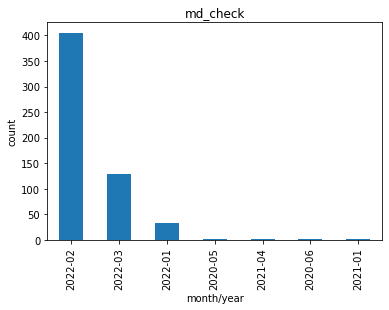

In [86]:
md_check = fox_covid['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

setting the index to the month_year column

In [106]:
fox_covid.set_index('month_year').head()

,title,byline,date,content
month_year,,,,
2022-03,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.",2022-03-15 14:00:00,close video cdc has done a ‘disservice...
2022-03,Republicans go for kill shot on COVID transpor...,Tyler Olson,2022-03-15 14:09:00,close video fox news flash top headlin...
2022-03,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,2022-03-16 05:00:00,close video dr. makary: covid virus 'b...
2022-03,Lara Trump slams Biden for mask mandates based...,Fox News Staff,2022-03-16 08:23:00,close video lara trump rips biden for ...
2022-03,"Novak Djokovic, Russian players expected to co...",Associated Press,2022-03-16 09:39:00,close video fox news flash top headlin...


selecting dates to makes timeframes in datasets equal

In [109]:
fox_covid_cleaned = fox_covid[fox_covid['month_year'].between('2021-12', '2022-03')].copy()
fox_covid_cleaned.head()

,title,byline,date,content,month_year
0,COVID loneliness crisis – here's how you can f...,"Nicole Saphier, M.D.",2022-03-15 14:00:00,close video cdc has done a ‘disservice...,2022-03
1,Republicans go for kill shot on COVID transpor...,Tyler Olson,2022-03-15 14:09:00,close video fox news flash top headlin...,2022-03
2,10 biggest COVID mistakes – Americans deserve ...,Dr. Marty Makary,2022-03-16 05:00:00,close video dr. makary: covid virus 'b...,2022-03
3,Lara Trump slams Biden for mask mandates based...,Fox News Staff,2022-03-16 08:23:00,close video lara trump rips biden for ...,2022-03
4,"Novak Djokovic, Russian players expected to co...",Associated Press,2022-03-16 09:39:00,close video fox news flash top headlin...,2022-03


Exporting cleaned data to join with other foxnews data to make wordclouds

In [112]:
fox_covid_cleaned.to_csv (r'C:\Users\zach\fox_covid_cleaned.csv', header=True)

Verifying the correct period of time was selected

Text(0, 0.5, 'count')

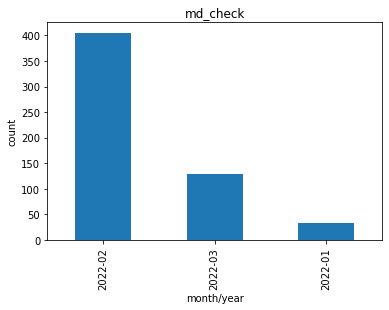

In [110]:
md_check2 = fox_covid_cleaned['month_year'].value_counts().plot(kind='bar')
md_check2.set_title("md_check")
md_check2.set_xlabel("month/year")
md_check2.set_ylabel("count")